# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\Data sets\Purchase.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
data.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [9]:
# Feature Engineering
x=data.iloc[:,[2,3]].values  # independent variables
y=data.iloc[:,4].values     # dependent variable

In [10]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [12]:
# spliting the data into Training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=12)

In [13]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(280, 2) (280,) (120, 2) (120,)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
# Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [16]:
y_pred = classifier.predict(x_test)

In [17]:
y_pred_prob = classifier.predict_proba(x_test)
y_pred_prob

array([[7.43222961e-03, 9.92567770e-01],
       [6.77697227e-01, 3.22302773e-01],
       [1.49973095e-02, 9.85002690e-01],
       [9.70778333e-01, 2.92216670e-02],
       [9.63141802e-01, 3.68581979e-02],
       [8.40334682e-02, 9.15966532e-01],
       [9.94221454e-01, 5.77854606e-03],
       [9.45782081e-01, 5.42179193e-02],
       [7.84433805e-03, 9.92155662e-01],
       [8.50402916e-01, 1.49597084e-01],
       [9.90957383e-01, 9.04261686e-03],
       [5.78705206e-01, 4.21294794e-01],
       [3.71878654e-01, 6.28121346e-01],
       [1.76882589e-02, 9.82311741e-01],
       [6.40373105e-01, 3.59626895e-01],
       [2.41087638e-01, 7.58912362e-01],
       [4.21066784e-01, 5.78933216e-01],
       [2.67795430e-01, 7.32204570e-01],
       [9.45400421e-01, 5.45995785e-02],
       [9.74204190e-01, 2.57958096e-02],
       [3.98875375e-01, 6.01124625e-01],
       [4.28162907e-01, 5.71837093e-01],
       [6.47034469e-01, 3.52965531e-01],
       [7.77070510e-01, 2.22929490e-01],
       [1.973138

In [18]:
y_pred_prob.shape

(120, 2)

In [19]:
y_pred # predicted output values

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [20]:
y_test # Actual output values

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [26]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix ,classification_report, accuracy_score, log_loss
print(accuracy_score(y_test , y_pred))
confusion_matrix(y_test , y_pred)

0.825


array([[61, 12],
       [ 9, 38]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

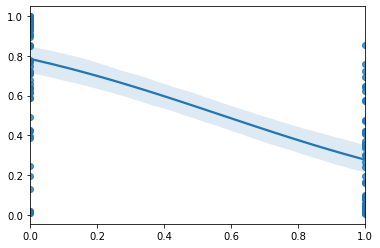

In [27]:
sns.regplot(y_test , y_pred_prob[:,0] , logistic = True)

In [28]:
log_loss(y_test, y_pred_prob)

0.4437561313056999

In [29]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_test_lr = lr.predict(x_test)
y_train_lr = lr.predict(x_train)

In [30]:
#TRAIN SET
print("Acuuracy for train set:",accuracy_score(y_train,y_train_lr))
print(confusion_matrix(y_train,y_train_lr))
print(classification_report(y_train,y_train_lr))

Acuuracy for train set: 0.875
[[174  10]
 [ 25  71]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       184
           1       0.88      0.74      0.80        96

    accuracy                           0.88       280
   macro avg       0.88      0.84      0.86       280
weighted avg       0.88      0.88      0.87       280



In [31]:
#TEST SET
print("Acuuracy for test set:",accuracy_score(y_test,y_test_lr))
print(confusion_matrix(y_test,y_test_lr))
print(classification_report(y_test,y_test_lr))

Acuuracy for test set: 0.825
[[61 12]
 [ 9 38]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        73
           1       0.76      0.81      0.78        47

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.83      0.82      0.83       120

